In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cars1/CARS.csv


# Exploring data and manipulation

In [3]:
df = pd.read_csv('/kaggle/input/cars1/CARS.csv')
df

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,"$36,945","$33,337",3.5,6.0,265,17,23,4451,106,189
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820","$21,761",2.0,4.0,200,24,31,2778,101,172
2,Acura,TSX 4dr,Sedan,Asia,Front,"$26,990","$24,647",2.4,4.0,200,22,29,3230,105,183
3,Acura,TL 4dr,Sedan,Asia,Front,"$33,195","$30,299",3.2,6.0,270,20,28,3575,108,186
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,"$43,755","$39,014",3.5,6.0,225,18,24,3880,115,197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,Volvo,C70 LPT convertible 2dr,Sedan,Europe,Front,"$40,565","$38,203",2.4,5.0,197,21,28,3450,105,186
424,Volvo,C70 HPT convertible 2dr,Sedan,Europe,Front,"$42,565","$40,083",2.3,5.0,242,20,26,3450,105,186
425,Volvo,S80 T6 4dr,Sedan,Europe,Front,"$45,210","$42,573",2.9,6.0,268,19,26,3653,110,190
426,Volvo,V40,Wagon,Europe,Front,"$26,135","$24,641",1.9,4.0,170,22,29,2822,101,180


In [4]:
df.sample(5) # random sample from data

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
350,Saturn,L300-2 4dr,Sedan,USA,Front,"$21,410","$19,801",3.0,6.0,182,20,28,3197,107,190
154,Honda,Civic DX 2dr,Sedan,Asia,Front,"$13,270","$12,175",1.7,4.0,115,32,38,2432,103,175
153,Honda,Element LX,SUV,Asia,All,"$18,690","$17,334",2.4,4.0,160,21,24,3468,101,167
183,Infiniti,M45 4dr,Sedan,Asia,Rear,"$42,845","$38,792",4.5,8.0,340,17,23,3851,110,197
402,Volkswagen,Golf GLS 4dr,Sedan,Europe,Front,"$18,715","$17,478",2.0,4.0,115,24,31,2897,99,165


In [5]:
df.shape # size of data

(428, 15)

In [6]:
df.columns #name of columns

Index(['Make', 'Model', 'Type', 'Origin', 'DriveTrain', 'MSRP', 'Invoice',
       'EngineSize', 'Cylinders', 'Horsepower', 'MPG_City', 'MPG_Highway',
       'Weight', 'Wheelbase', 'Length'],
      dtype='object')

In [7]:
df.dtypes # data type of each column

Make            object
Model           object
Type            object
Origin          object
DriveTrain      object
MSRP            object
Invoice         object
EngineSize     float64
Cylinders      float64
Horsepower       int64
MPG_City         int64
MPG_Highway      int64
Weight           int64
Wheelbase        int64
Length           int64
dtype: object

In [9]:
df.duplicated().sum() # how many duplicated rows 

0

In [10]:
df.isna().sum() # how many null vales in each column 

Make           0
Model          0
Type           0
Origin         0
DriveTrain     0
MSRP           0
Invoice        0
EngineSize     0
Cylinders      2
Horsepower     0
MPG_City       0
MPG_Highway    0
Weight         0
Wheelbase      0
Length         0
dtype: int64

In [12]:
df['Cylinders'].fillna(df['Cylinders'].mean,inplace=True) # replase null values of Cylinders with its mean

In [13]:
df.isna().sum() # check again 

Make           0
Model          0
Type           0
Origin         0
DriveTrain     0
MSRP           0
Invoice        0
EngineSize     0
Cylinders      0
Horsepower     0
MPG_City       0
MPG_Highway    0
Weight         0
Wheelbase      0
Length         0
dtype: int64

In [15]:
# process to change data type of MSRP to numeric
df['MSRP'] = df['MSRP'].str.lstrip('$') # remove from the left  
df['MSRP'] = df['MSRP'].str.replace(',','') # replace this sign ','
df['MSRP'] = df['MSRP'].astype('int') # finally convert the data type
df.MSRP

0      36945
1      23820
2      26990
3      33195
4      43755
       ...  
423    40565
424    42565
425    45210
426    26135
427    35145
Name: MSRP, Length: 428, dtype: int64

In [16]:
# same process to change data type of Invoice to numeric
df['Invoice'] = df['Invoice'].str.lstrip('$') # remove from the left  
df['Invoice'] = df['Invoice'].str.replace(',','') # replace this sign ','
df['Invoice'] = df['Invoice'].astype('int') # finally convert the data type
df.Invoice

0      33337
1      21761
2      24647
3      30299
4      39014
       ...  
423    38203
424    40083
425    42573
426    24641
427    33112
Name: Invoice, Length: 428, dtype: int64

# Questions and Visualizations

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df.head(2)

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,36945,33337,3.5,6.0,265,17,23,4451,106,189
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,23820,21761,2.0,4.0,200,24,31,2778,101,172


In [20]:
df.describe() # statistical infomation

,MSRP,Invoice,EngineSize,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
count,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000
mean,32774.855140,30014.700935,3.196729,215.885514,20.060748,26.843458,3577.953271,108.154206,186.362150
std,19431.716674,17642.117750,1.108595,71.836032,5.238218,5.741201,758.983215,8.311813,14.357991
min,10280.000000,9875.000000,1.300000,73.000000,10.000000,12.000000,1850.000000,89.000000,143.000000
25%,20334.250000,18866.000000,2.375000,165.000000,17.000000,24.000000,3104.000000,103.000000,178.000000
50%,27635.000000,25294.500000,3.000000,210.000000,19.000000,26.000000,3474.500000,107.000000,187.000000
75%,39205.000000,35710.250000,3.900000,255.000000,21.250000,29.000000,3977.750000,112.000000,194.000000
max,192465.000000,173560.000000,8.300000,500.000000,60.000000,66.000000,7190.000000,144.000000,238.000000


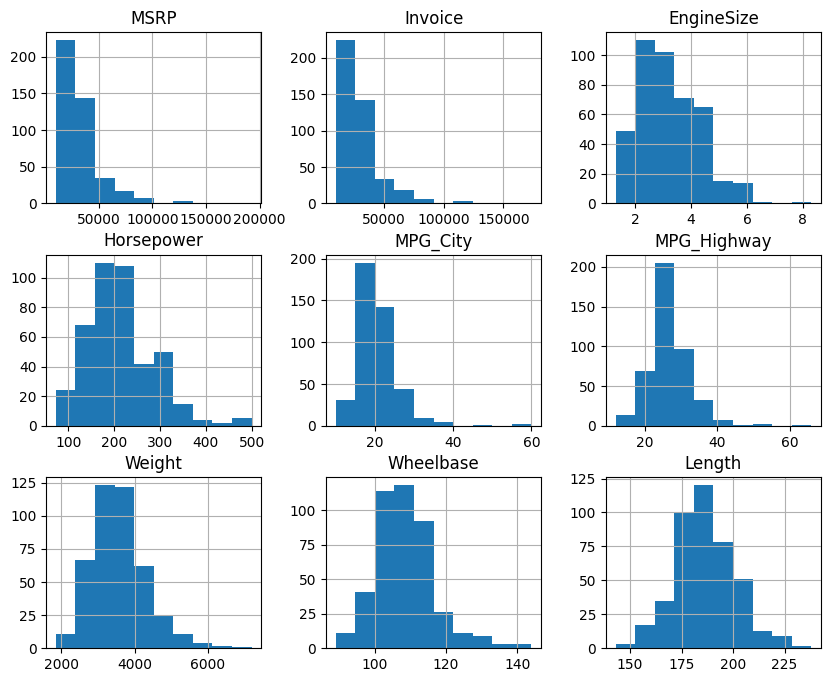

In [21]:
df.hist(figsize=(10,8)) # Visualizations distribution columns have a data type "Number "
plt.show()

In [25]:
df['Model'].value_counts() # number of each unique value

Model
G35 4dr                                    2
C320 4dr                                   2
C240 4dr                                   2
MDX                                        1
Marauder 4dr                               1
                                          ..
Ranger 2.3 XL Regular Cab                  1
F-150 Supercab Lariat                      1
F-150 Regular Cab XL                       1
Thunderbird Deluxe convert w/hardtop 2d    1
XC70                                       1
Name: count, Length: 425, dtype: int64

In [28]:
df['Type'].unique()

array(['SUV', 'Sedan', 'Sports', 'Wagon', 'Truck', 'Hybrid'], dtype=object)

In [39]:
df.groupby('Type')['Invoice'].agg([min,max]) # min & max inovice for each type

,min,max
Type,,
Hybrid,17911,18926
SUV,16949,71540
Sedan,9875,119600
Sports,16943,173560
Truck,11879,48541
Wagon,11410,56474


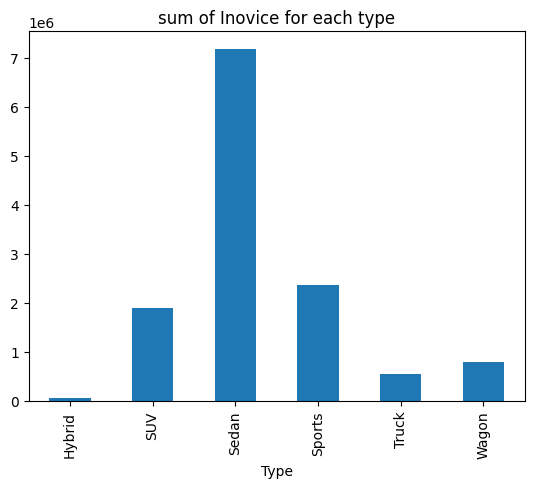

In [45]:
(df.groupby('Type')['Invoice'].sum()).plot(kind='bar')
plt.title('sum of Inovice for each type')
plt.show()

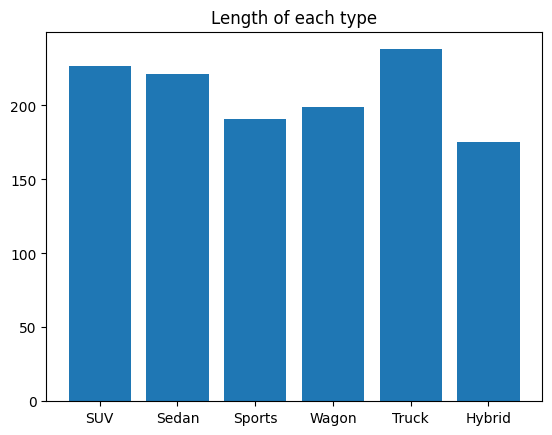

In [46]:
plt.bar(df['Type'],df['Length'])
plt.title('Length of each type')
plt.show()

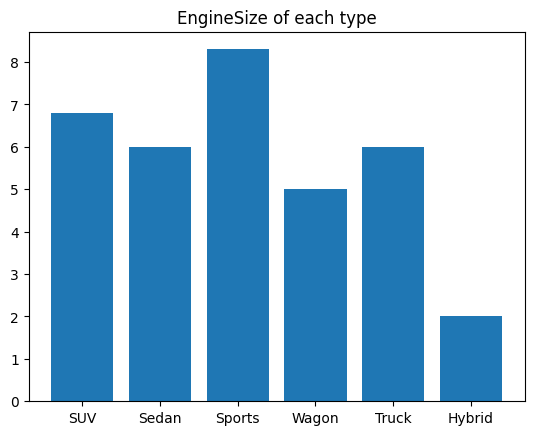

In [47]:
plt.bar(df['Type'],df['EngineSize'])
plt.title('EngineSize of each type')
plt.show()

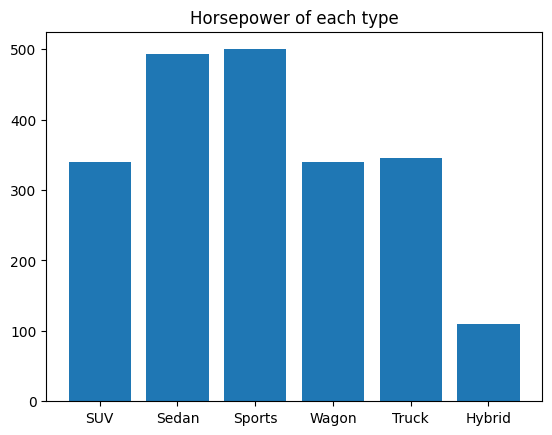

In [49]:
plt.bar(df['Type'],df['Horsepower'])
plt.title('Horsepower of each type')
plt.show()

In [40]:
df['Origin'].unique()

array(['Asia', 'Europe', 'USA'], dtype=object)

In [51]:
df.groupby('Origin')['Invoice'].agg([min,max])

,min,max
Origin,,
Asia,9875,79978
Europe,15437,173560
USA,10319,74451


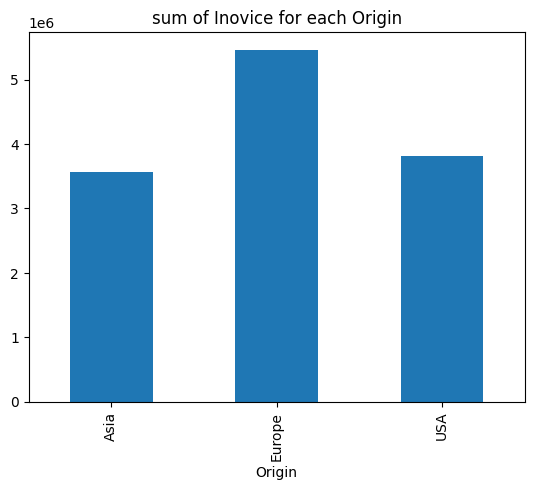

In [56]:
(df.groupby('Origin')['Invoice'].sum()).plot(kind='bar')
plt.title('sum of Inovice for each Origin')
plt.show()

best wishes